In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import json
import operator

In [3]:
# get all the keys 
with open('training/label.idl') as f:
    lines = f.read().splitlines()
    annotations = {}
    for line in lines:
        annotation = json.loads(line)
        annotations.update(annotation)
        

In [4]:
print(len(annotations))
#annotations = sorted(annotations.items(), key=operator.itemgetter(0))

10000


In [5]:
i = 0
for k,v in annotations.items():
    i += 1
    print(k,v)
    if i == 5:
        break

(u'63254.jpg', [[516.8332800000001, 199.6668, 619.00032, 242.66663999999997, 1], [304.99968, 209.25000000000003, 324.0, 227.75003999999998, 1], [404.0, 213.24996000000002, 429.50016, 229.49999999999997, 1]])
(u'63526.jpg', [[119.49951999999999, 200.49984, 147.74976, 212.74992000000003, 1], [281.00032, 199.25028, 294.50048, 212.00004, 1]])
(u'62211.jpg', [[162.0, 191.66652, 185.16672, 222.1668, 1], [110.83328, 197.49996, 145.16672, 224.49996000000002, 1], [0.0, 176.83344, 57.66668799999999, 288.66672, 1], [132.66688, 201.66660000000002, 176.0, 232.3332, 1], [253.24992000000003, 207.25019999999998, 261.50016, 227.00016, 2], [191.75039999999998, 207.25019999999998, 212.25024000000002, 223.25004, 1]])
(u'67777.jpg', [[0.16666688, 99.8334, 79.66656, 152.1666, 1], [116.99968, 58.83336, 200.99968, 127.1664, 1], [86.49984, 77.50008, 194.1664, 147.49992, 1], [161.33312, 96.33348000000001, 298.1664, 198.66672, 1], [237.16672, 93.99995999999999, 287.8336, 133.3332, 1], [284.33344, 90.16668, 376.4

[[0.16666688, 99.8334, 79.66656, 152.1666, 1], [116.99968, 58.83336, 200.99968, 127.1664, 1], [86.49984, 77.50008, 194.1664, 147.49992, 1], [161.33312, 96.33348000000001, 298.1664, 198.66672, 1], [237.16672, 93.99995999999999, 287.8336, 133.3332, 1], [284.33344, 90.16668, 376.49984000000006, 160.99992, 1], [342.66688, 84.6666, 397.00032, 129.33324, 1], [418.83328, 85.5, 527.16672, 153.66672, 1], [471.00032, 56.99988, 638.33344, 212.66675999999998, 1]]


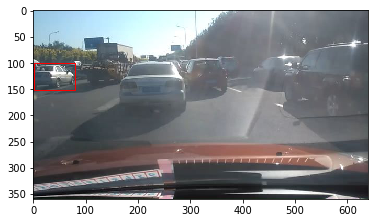

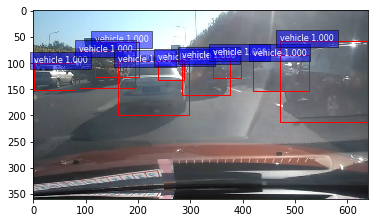

The box is [[0.16666688, 99.8334, 79.66656, 152.1666, 1], [116.99968, 58.83336, 200.99968, 127.1664, 1], [86.49984, 77.50008, 194.1664, 147.49992, 1], [161.33312, 96.33348000000001, 298.1664, 198.66672, 1], [237.16672, 93.99995999999999, 287.8336, 133.3332, 1], [284.33344, 90.16668, 376.49984000000006, 160.99992, 1], [342.66688, 84.6666, 397.00032, 129.33324, 1], [418.83328, 85.5, 527.16672, 153.66672, 1], [471.00032, 56.99988, 638.33344, 212.66675999999998, 1]]
image size is (360, 640, 3)


In [7]:
# get a viusalization 
CLASSES = {1:"vehicle", 2:"pedestrian", 3:"cyclist", 20:"traffic lights"}
imgfile = "67777.jpg"
img = plt.imread("training/{}".format(imgfile))
box = annotations[imgfile]
print box
# Create figure and axes
fig,ax = plt.subplots(1)
ax.imshow(img)
for eachbox in box:
    xmin, ymin, xmax, ymax,cls = eachbox 
    
    # Create a Rectangle patch, bottom left, width, height
    rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none', label=CLASSES[cls])

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    plt.gca().text(xmin, ymin,
                    '{:s} {:.3f}'.format(CLASSES[cls], 1.0),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=8, color='white')
    

plt.show()

print "The box is {}".format(box)
print "image size is {}".format(img.shape)